In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Vivekfreak/Datasets/main/book%20(1).csv")
df.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [3]:
df.isna().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

**Association rule with 20% support and 50% confidence**

In [4]:
frequent_items = apriori(df, min_support=0.2, use_colnames=True)

In [5]:
frequent_items

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(ChildBks, CookBks)"


In [6]:
model = association_rules(frequent_items, metric='lift',min_threshold=0.5)

In [7]:
model

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240
1,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069


In [8]:
model[model['lift']>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240
1,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069


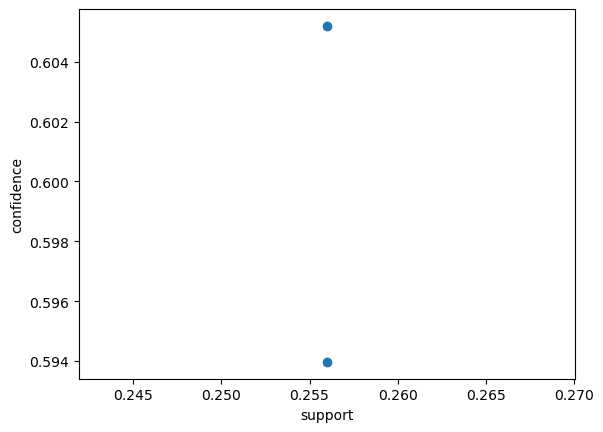

In [9]:
# visualization of obtained rule
plt.scatter(model['support'],model['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

**Association rule with 5% support and 80% confidence**

In [10]:
frequent_items1 = apriori(df, min_support=0.05, use_colnames=True)

In [11]:
frequent_items1

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
95,0.0600,"(DoItYBks, YouthBks, CookBks, GeogBks)"
96,0.0560,"(ArtBks, YouthBks, CookBks, GeogBks)"
97,0.0650,"(DoItYBks, ArtBks, CookBks, GeogBks)"
98,0.0510,"(DoItYBks, YouthBks, CookBks, GeogBks, ChildBks)"


In [12]:
model1 = association_rules(frequent_items1, metric='lift',min_threshold=0.8)

In [13]:
model1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
657,(DoItYBks),"(ArtBks, ChildBks, CookBks, GeogBks)",0.2820,0.0835,0.0535,0.189716,2.272052,0.029953,1.131085
658,(CookBks),"(DoItYBks, ChildBks, ArtBks, GeogBks)",0.4310,0.0595,0.0535,0.124130,2.086217,0.027856,1.073789
659,(GeogBks),"(DoItYBks, ArtBks, ChildBks, CookBks)",0.2760,0.0820,0.0535,0.193841,2.363910,0.030868,1.138733
660,(ChildBks),"(DoItYBks, ArtBks, CookBks, GeogBks)",0.4230,0.0650,0.0535,0.126478,1.945808,0.026005,1.070379


In [14]:
model1[model1['lift']>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
657,(DoItYBks),"(ArtBks, ChildBks, CookBks, GeogBks)",0.2820,0.0835,0.0535,0.189716,2.272052,0.029953,1.131085
658,(CookBks),"(DoItYBks, ChildBks, ArtBks, GeogBks)",0.4310,0.0595,0.0535,0.124130,2.086217,0.027856,1.073789
659,(GeogBks),"(DoItYBks, ArtBks, ChildBks, CookBks)",0.2760,0.0820,0.0535,0.193841,2.363910,0.030868,1.138733
660,(ChildBks),"(DoItYBks, ArtBks, CookBks, GeogBks)",0.4230,0.0650,0.0535,0.126478,1.945808,0.026005,1.070379


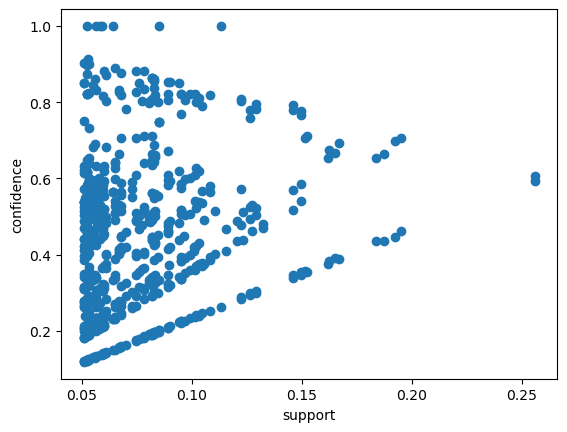

In [15]:
plt.scatter(model1['support'],model1['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

**Association rule with 20% support and 60% confidence and Length=2**

In [16]:
frequent_items3 = apriori(df, min_support=0.2, max_len=2, use_colnames=True)

In [17]:
frequent_items3

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(ChildBks, CookBks)"


In [18]:
model2 = association_rules(frequent_items3, metric='lift',min_threshold=0.6)

In [19]:
model2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240
1,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069


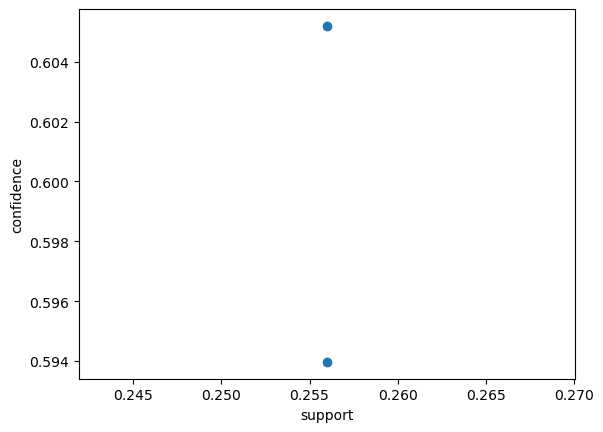

In [20]:
plt.scatter(model2['support'],model2['confidence'])
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()